# BEV Transformations

Here we are exploring how we can convert monocular images to a prespective view image that will give us a top-down view of every angle

In [6]:
import pandas as pd

root_path = "/work/cvpr/repo/OpenLane-V2/data/OpenLane-V2/data_files/"
 
data_dict_subset_A = pd.read_pickle('/work/cvpr/repo/OpenLane-V2/data/OpenLane-V2/data_dict_subset_A.pkl')

frame = data_dict_subset_A[('train', '00000', '315967376899927209')]

images=[]
for view in frame['sensor'].keys():
    images.append(f"{root_path}{frame['sensor'][view]['image_path']}")
    
images

['/work/cvpr/repo/OpenLane-V2/data/OpenLane-V2/data_files/train/00000/image/ring_front_center/315967376899927209.jpg',
 '/work/cvpr/repo/OpenLane-V2/data/OpenLane-V2/data_files/train/00000/image/ring_front_left/315967376887425437.jpg',
 '/work/cvpr/repo/OpenLane-V2/data/OpenLane-V2/data_files/train/00000/image/ring_front_right/315967376862451246.jpg',
 '/work/cvpr/repo/OpenLane-V2/data/OpenLane-V2/data_files/train/00000/image/ring_rear_left/315967376857428267.jpg',
 '/work/cvpr/repo/OpenLane-V2/data/OpenLane-V2/data_files/train/00000/image/ring_rear_right/315967376892441193.jpg',
 '/work/cvpr/repo/OpenLane-V2/data/OpenLane-V2/data_files/train/00000/image/ring_side_left/315967376872412942.jpg',
 '/work/cvpr/repo/OpenLane-V2/data/OpenLane-V2/data_files/train/00000/image/ring_side_right/315967376877482498.jpg']

# BEV with prespective view of images

We are going to transform the images here

In [7]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


'/work/cvpr/repo/OpenLane-V2/data/OpenLane-V2/data_files/train/00000/image/ring_front_center/315967376899927209.jpg'

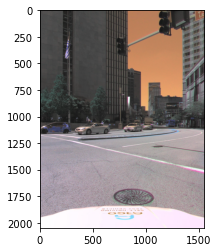

In [8]:
import cv2
import matplotlib.pyplot as plt

test_img = cv2.imread(images[0])

plt.imshow(test_img)
images[0]

In [9]:
def transform_prespective(image):
    src_points = []
    dst_points = []
    if image.shape[0] == 1550: 
        src_points = np.float32([
            [0, 1150], 
            [300, 1550],
            [2048, 1150], 
            [1800, 1550]
        ])
        dst_points = np.float32([
            [0, 0],
            [0, 1550], 
            [2048, 0],
            [2048, 1550]
        ])
    else:
        src_points = np.float32([
         [0, 1180],
         [0, 2048],
         [1550, 1180],
         [1550, 2048]
        ])
        dst_points = np.float32([
            [0, 0],
            [0, 2048],
            [1550, 0],
            [1550, 2048]
        ])
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    if image.shape[0] == 1550: 
        Img = cv2.warpPerspective(image, M, (2048, 1550))
    else:
        Img = cv2.warpPerspective(image, M, (1550, 2048))
    
    return Img

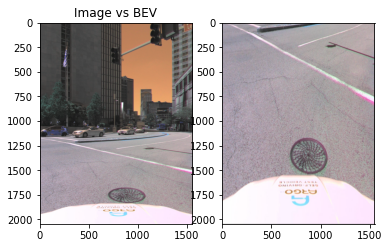

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(images[0]))
plt.title('Image vs BEV')


plt.subplot(1, 2, 2)
plt.imshow(transform_prespective(cv2.imread(images[0])))

plt.show()


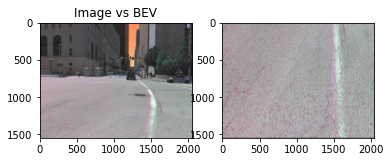

In [14]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(images[1]))
plt.title('Image vs BEV')


plt.subplot(1, 2, 2)
plt.imshow(transform_prespective(cv2.imread(images[1])))

plt.show()


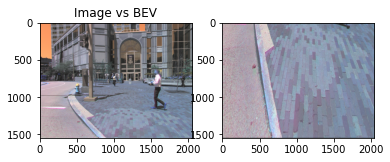

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(images[2]))
plt.title('Image vs BEV')


plt.subplot(1, 2, 2)
plt.imshow(transform_prespective(cv2.imread(images[2])))

plt.show()


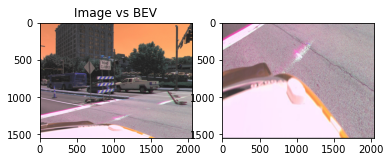

In [21]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(images[3]))
plt.title('Image vs BEV')


plt.subplot(1, 2, 2)
plt.imshow(transform_prespective(cv2.imread(images[3])))

plt.show()


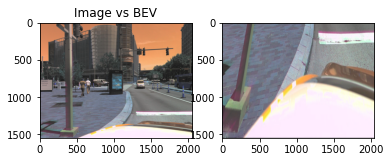

In [22]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(images[4]))
plt.title('Image vs BEV')


plt.subplot(1, 2, 2)
plt.imshow(transform_prespective(cv2.imread(images[4])))

plt.show()


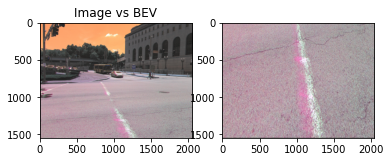

In [23]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(images[5]))
plt.title('Image vs BEV')


plt.subplot(1, 2, 2)
plt.imshow(transform_prespective(cv2.imread(images[5])))

plt.show()


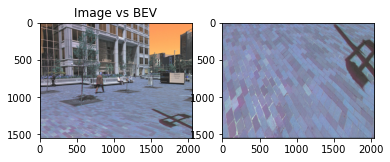

In [24]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(images[6]))
plt.title('Image vs BEV')


plt.subplot(1, 2, 2)
plt.imshow(transform_prespective(cv2.imread(images[6])))

plt.show()
